In [1]:
#import sys
#!{sys.executable} -m pip install xgboost

In [1]:
# import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Telecom companies (cable or wireless). These companies may provide a full range of products and services, 
including wireless network, internet, TV, cell phone, and home phone services (AT&T, Sprint, Verizon,
Cox Communications, etc.). Some specialize in mobile telecommunications (China Mobile, Vodafone, T-Mobile, etc.).

In [2]:
# Importing the dataset 
# Churn, rate at which customers stop doing business with a company over a given period of time
df = pd.read_csv('/users/rahulkp/downloads/telecommunications_churn (1).csv')
df

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
3                 84                0                    0     299.4   
4                 75                0                    0     166.7   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
3             61.9       196.9                 6.6                       2   
4            148.3       186.9                10.1                       3   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
3                      1         71       50.90             88   
4                      1        113       28.34            122   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
3               5.26           89          8.86                    7   
4              12.61          121          8.41                    3   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
3                     1.78         66.80      0  
4                     2.73         52.09      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [3]:
df.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [4]:
# shape
df.shape

(3333, 19)

In [5]:
print(df['churn'].value_counts())
print("The percentage of not churn", (2850/3333)*100)
print("The percentage of churn", (483/3333)*100)

0    2850
1     483
Name: churn, dtype: int64
The percentage of not churn 85.5085508550855
The percentage of churn 14.491449144914492


<AxesSubplot:>

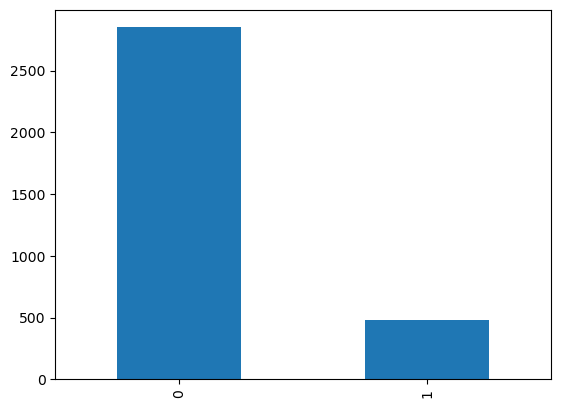

In [6]:
# Imbalanced dataset
# 1 = churn
# 0 = No churn
df['churn'].value_counts().plot(kind = 'bar')

In [7]:
# All the columns are in correct datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [8]:
# There is no missing values
df.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [9]:
# Statistical info of the data
df.describe()

account_length  voice_mail_plan  voice_mail_messages     day_mins  \
count     3333.000000      3333.000000          3333.000000  3333.000000   
mean       101.064806         0.276628             8.099010   179.775098   
std         39.822106         0.447398            13.688365    54.467389   
min          1.000000         0.000000             0.000000     0.000000   
25%         74.000000         0.000000             0.000000   143.700000   
50%        101.000000         0.000000             0.000000   179.400000   
75%        127.000000         1.000000            20.000000   216.400000   
max        243.000000         1.000000            51.000000   350.800000   

       evening_mins   night_mins  international_mins  customer_service_calls  \
count   3333.000000  3333.000000         3333.000000             3333.000000   
mean     200.980348   200.872037           10.237294                1.562856   
std       50.713844    50.573847            2.791840                1.315491   
min        0.000000    23.200000            0.000000                0.000000   
25%      166.600000   167.000000            8.500000                1.000000   
50%      201.400000   201.200000           10.300000                1.000000   
75%      235.300000   235.300000           12.100000                2.000000   
max      363.700000   395.000000           20.000000                9.000000   

       international_plan    day_calls   day_charge  evening_calls  \
count         3333.000000  3333.000000  3333.000000    3333.000000   
mean             0.096910   100.435644    30.562307     100.114311   
std              0.295879    20.069084     9.259435      19.922625   
min              0.000000     0.000000     0.000000       0.000000   
25%              0.000000    87.000000    24.430000      87.000000   
50%              0.000000   101.000000    30.500000     100.000000   
75%              0.000000   114.000000    36.790000     114.000000   
max              1.000000   165.000000    59.640000     170.000000   

       evening_charge  night_calls  night_charge  international_calls  \
count     3333.000000  3333.000000   3333.000000          3333.000000   
mean        17.083540   100.107711      9.039325             4.479448   
std          4.310668    19.568609      2.275873             2.461214   
min          0.000000    33.000000      1.040000             0.000000   
25%         14.160000    87.000000      7.520000             3.000000   
50%         17.120000   100.000000      9.050000             4.000000   
75%         20.000000   113.000000     10.590000             6.000000   
max         30.910000   175.000000     17.770000            20.000000   

       international_charge  total_charge        churn  
count           3333.000000   3333.000000  3333.000000  
mean               2.764581     59.449754     0.144914  
std                0.753773     10.502261     0.352067  
min                0.000000     22.930000     0.000000  
25%                2.300000     52.380000     0.000000  
50%                2.780000     59.470000     0.000000  
75%                3.270000     66.480000     0.000000  
max                5.400000     96.150000     1.000000

<AxesSubplot:>

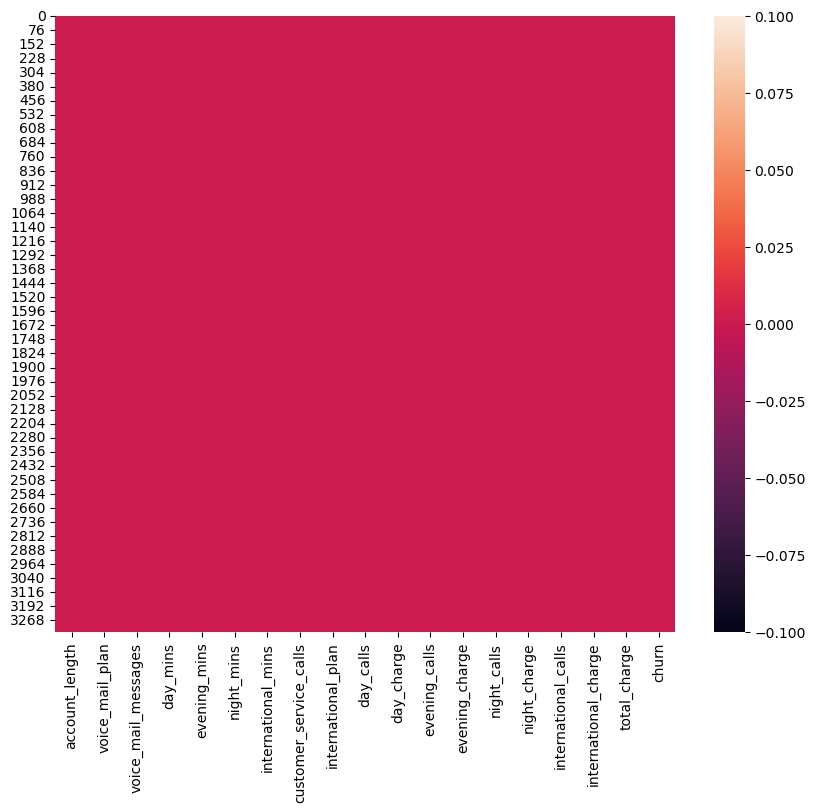

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [account_length, voice_mail_plan, voice_mail_messages, day_mins, evening_mins, night_mins, international_mins, customer_service_calls, international_plan, day_calls, day_charge, evening_calls, evening_charge, night_calls, night_charge, international_calls, international_charge, total_charge, churn]
Index: []

<AxesSubplot:>

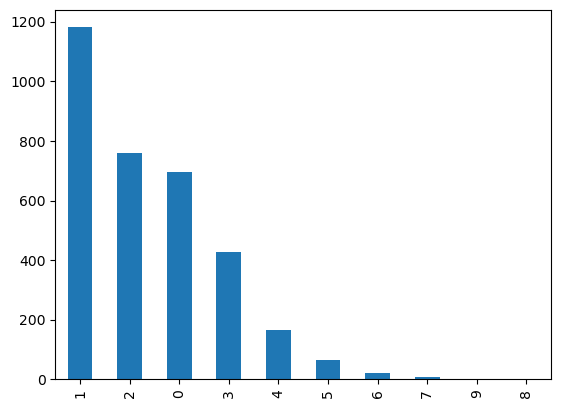

In [12]:
# Univariate Categorical features 
df['customer_service_calls'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

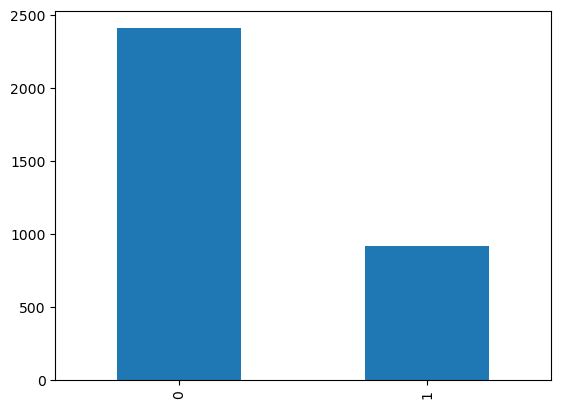

In [13]:
df['voice_mail_plan'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

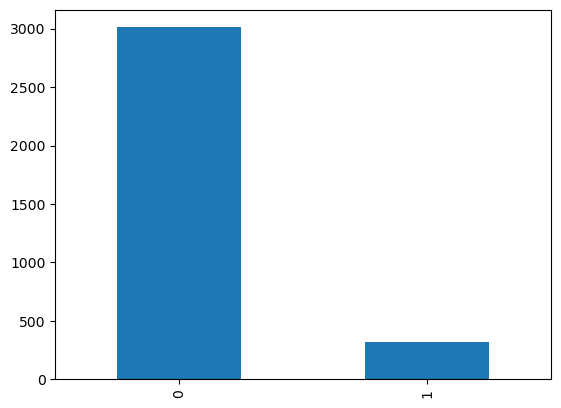

In [14]:
df['international_plan'].value_counts().plot(kind = 'bar')

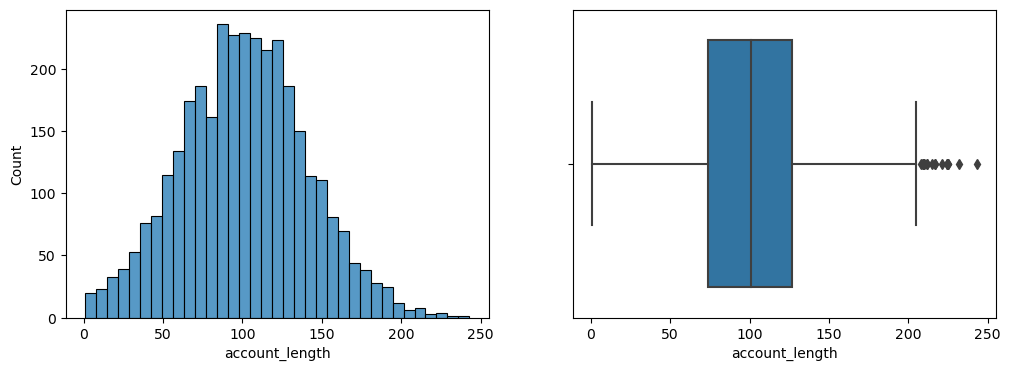

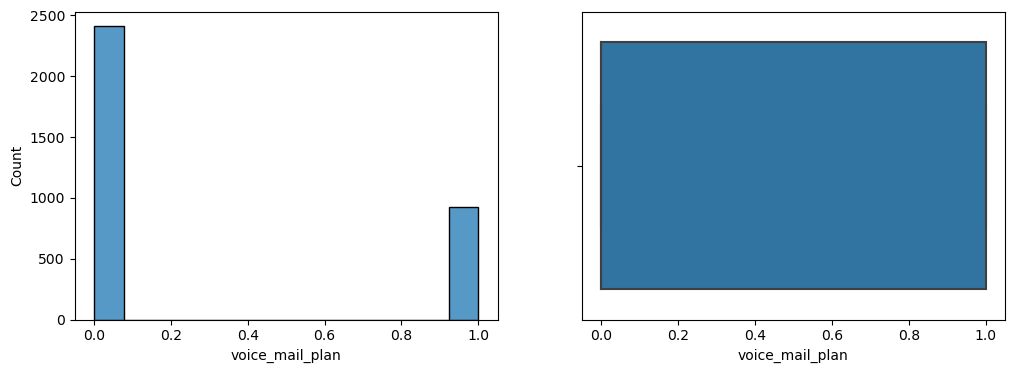

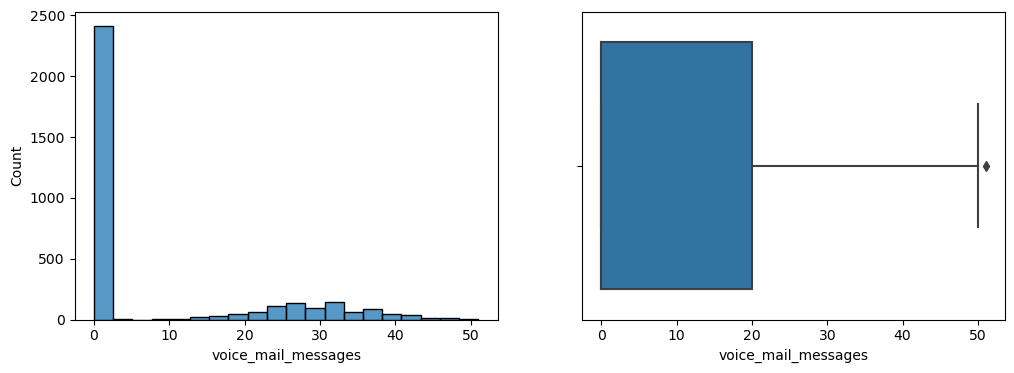

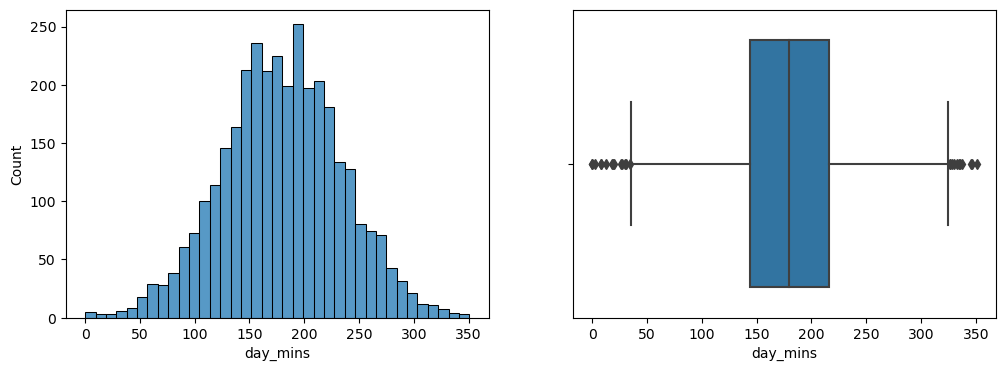

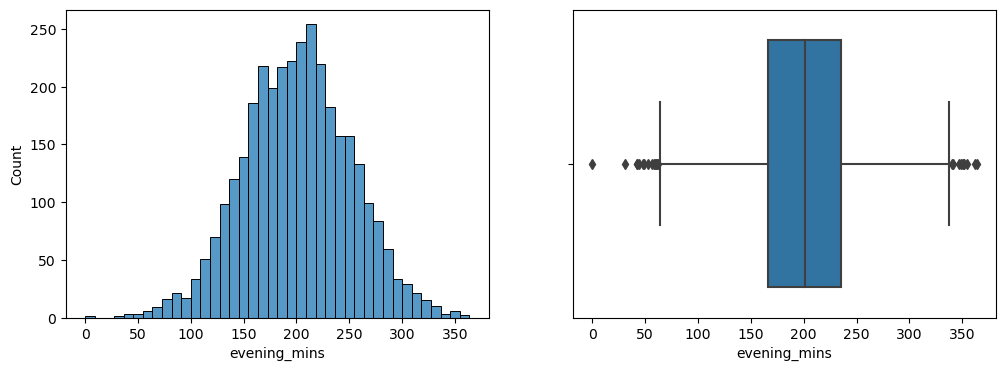

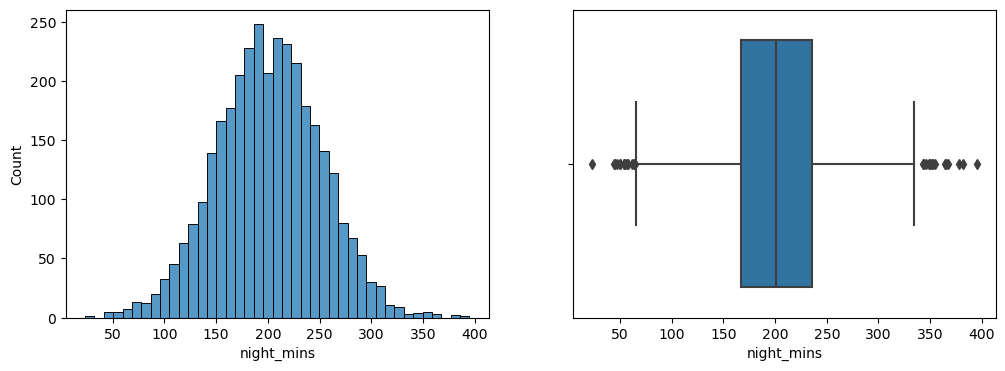

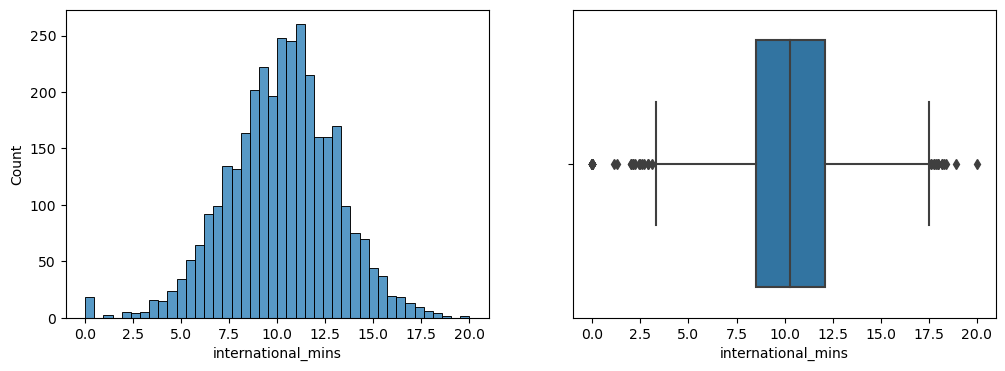

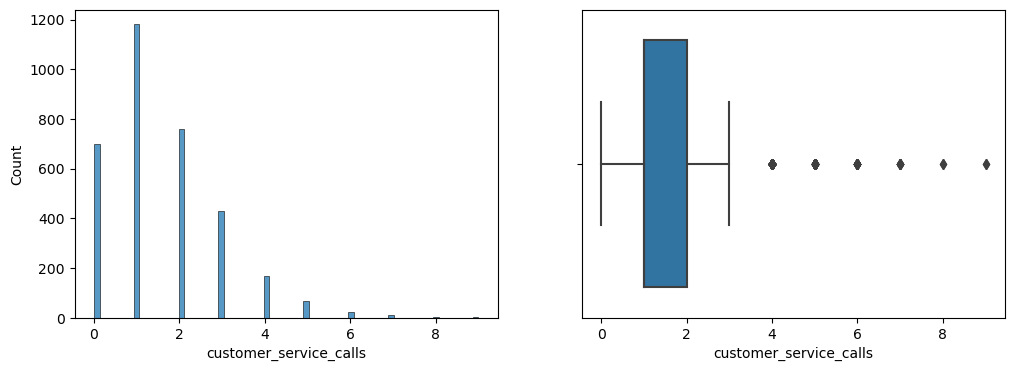

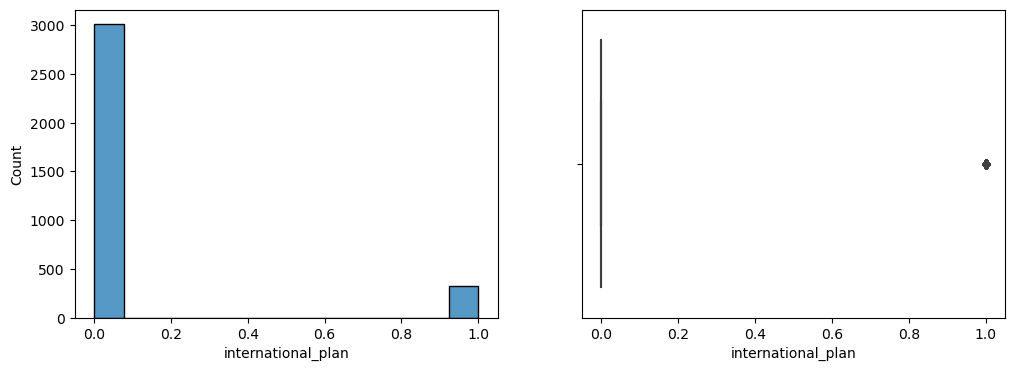

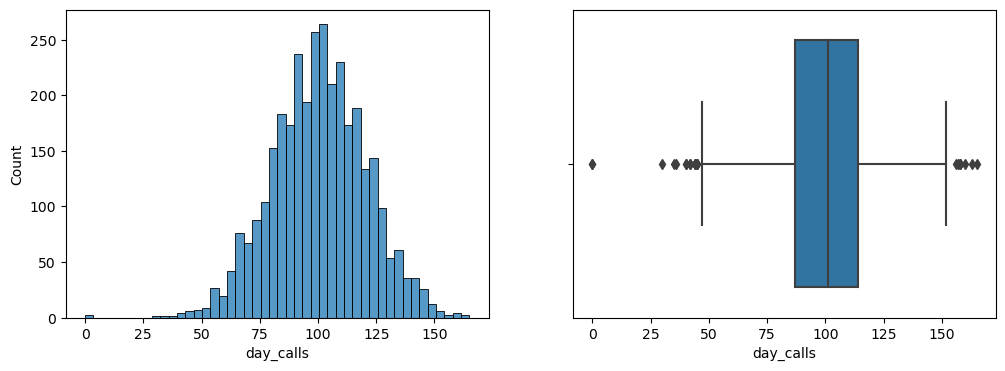

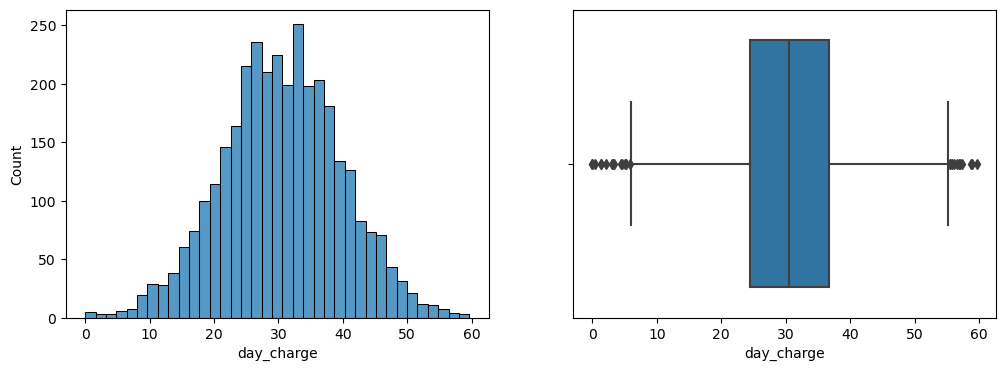

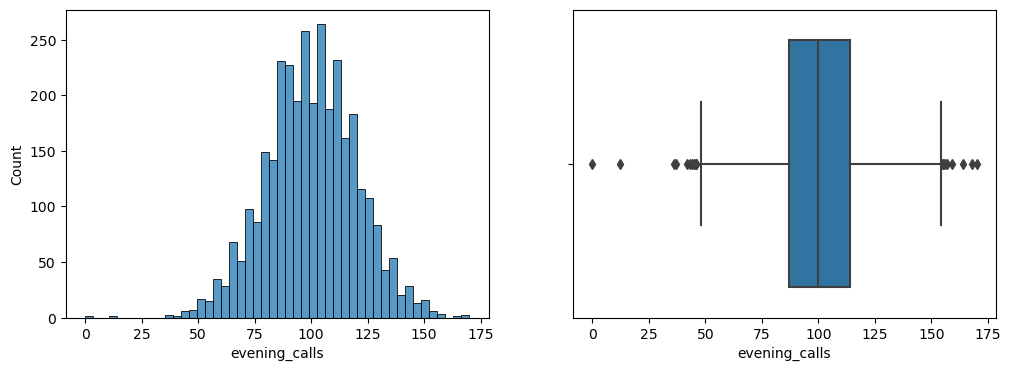

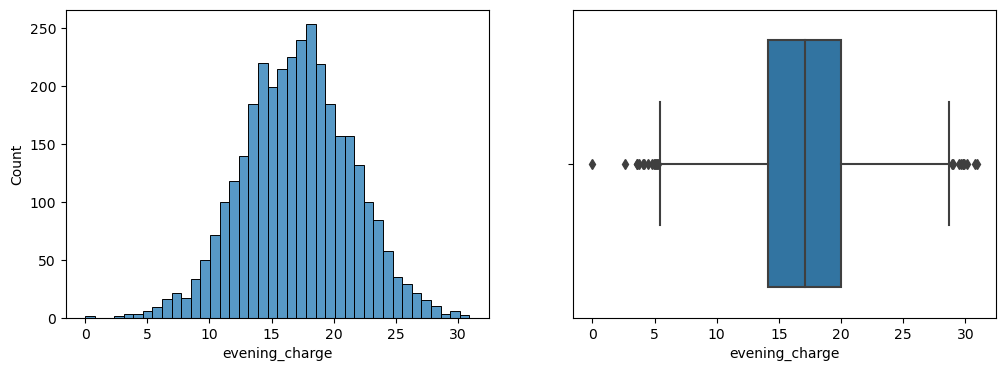

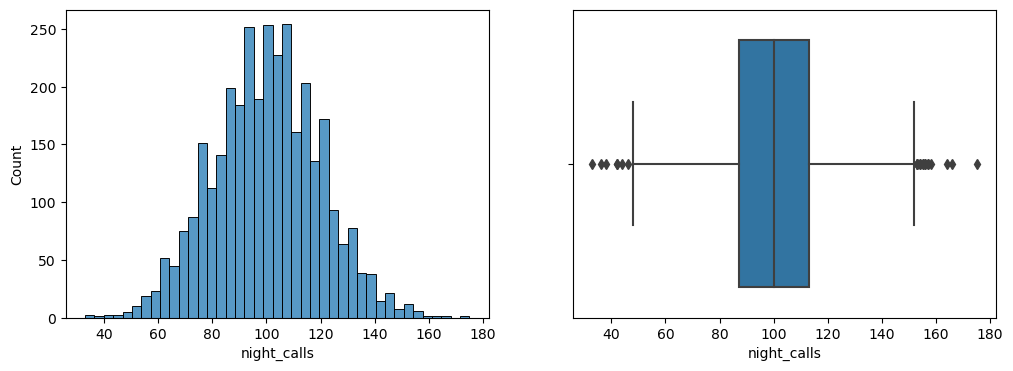

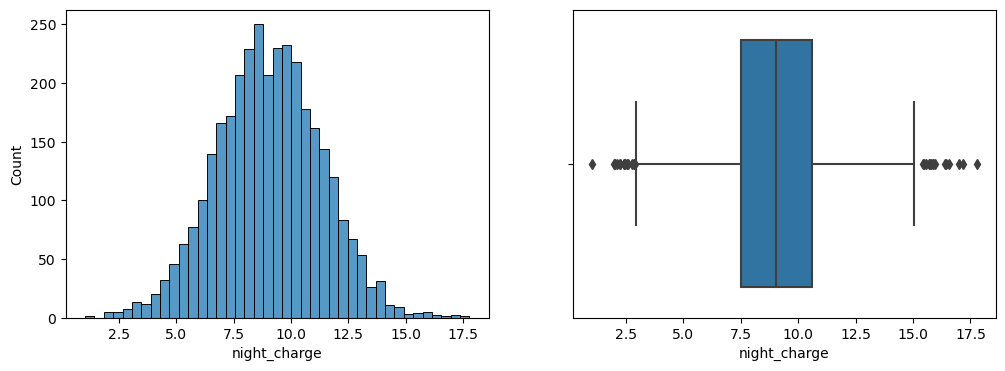

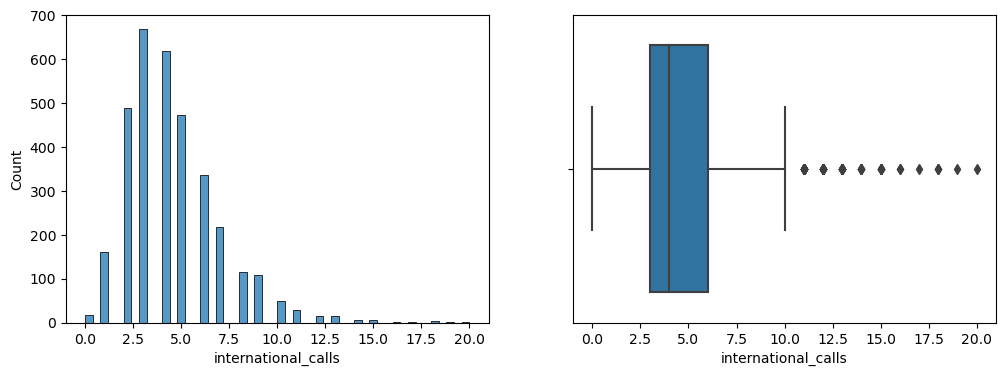

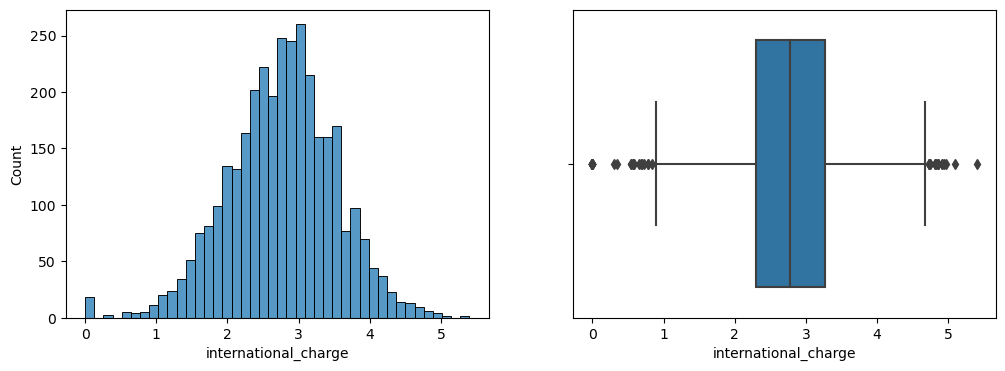

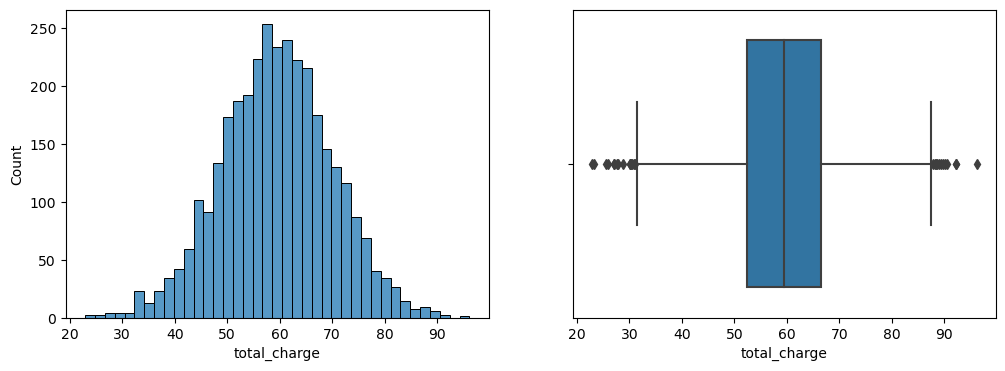

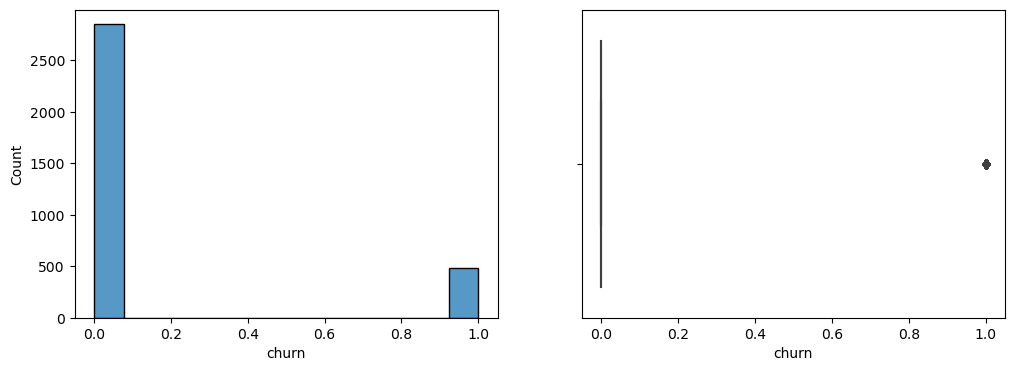

In [15]:
# Analyse all the features 
# Univariate analysis
for i in df.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4)) 
    sns.histplot(df[i], ax=ax[0])
    sns.boxplot(df[i], ax=ax[1])

<AxesSubplot:xlabel='voice_mail_plan', ylabel='Frequency'>

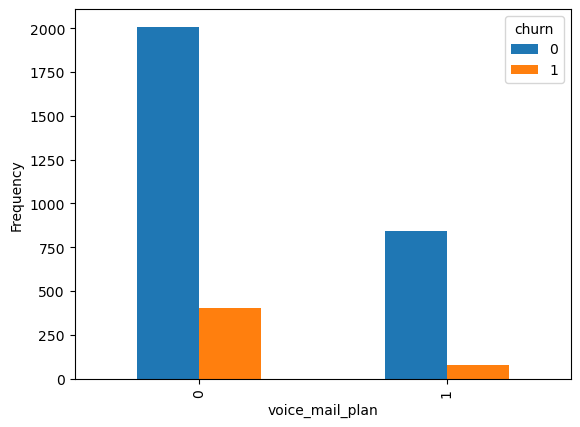

In [16]:
# Bivariate analysis
# Categorical Features
pd.crosstab(df['voice_mail_plan'], df['churn']).plot(kind="bar",ylabel='Frequency')

<AxesSubplot:xlabel='international_plan', ylabel='Frequency'>

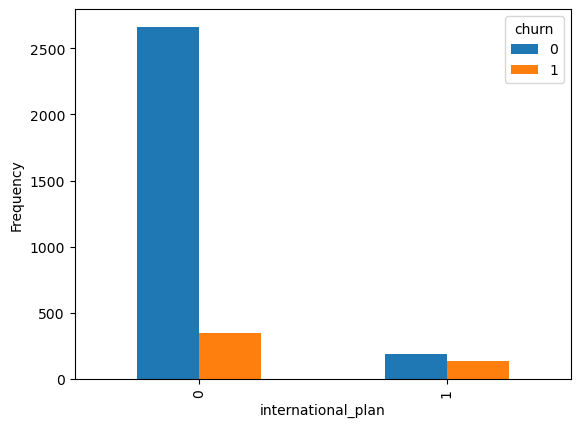

In [17]:
pd.crosstab(df['international_plan'], df['churn']).plot(kind="bar",ylabel='Frequency')

<AxesSubplot:>

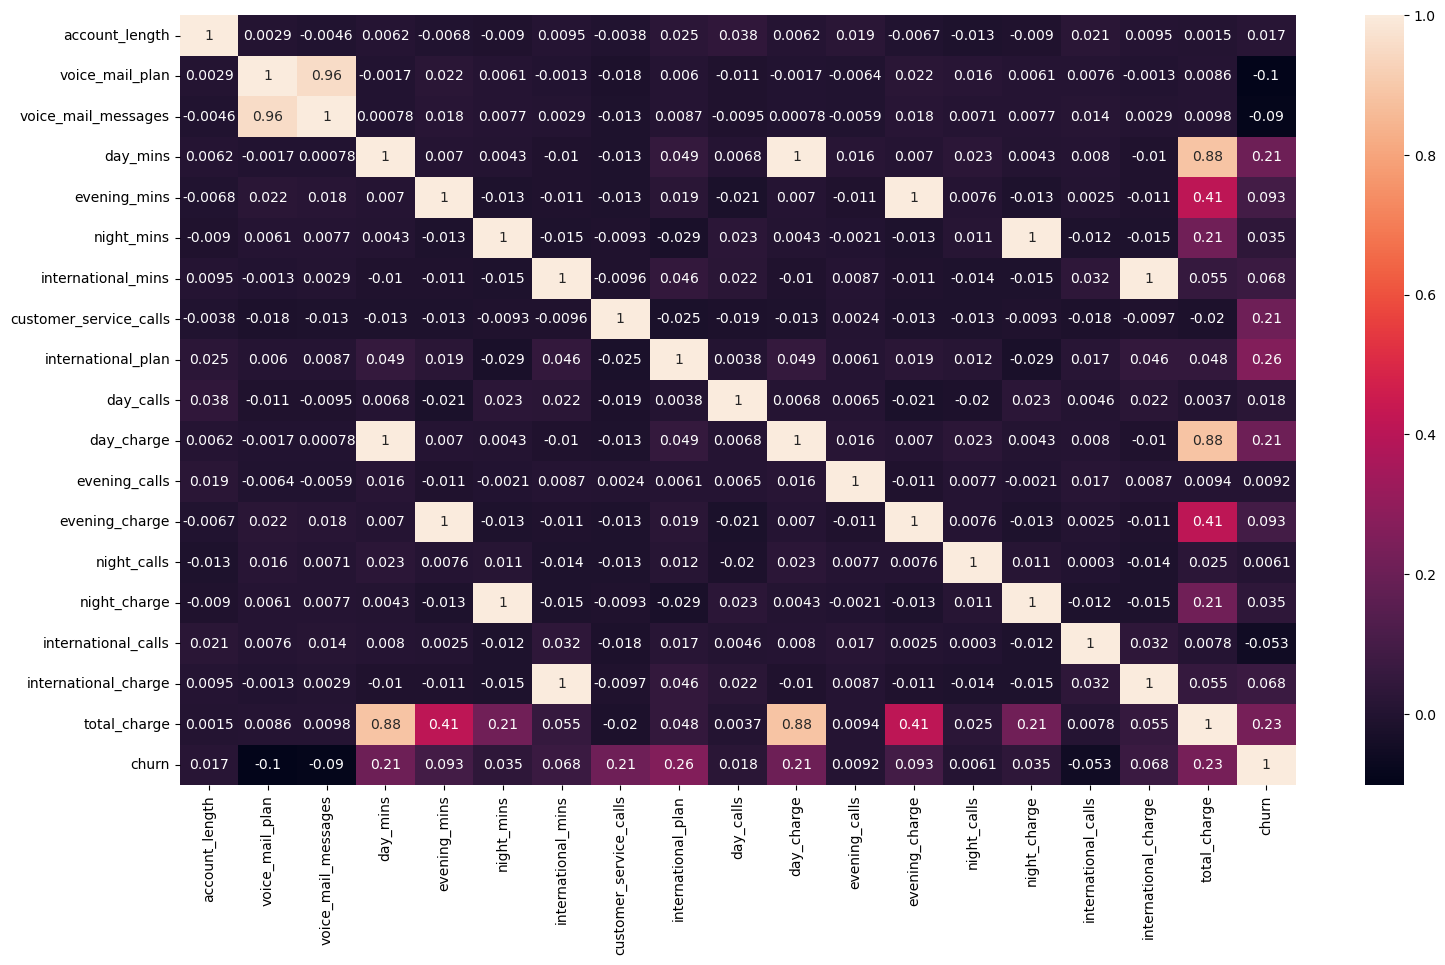

In [18]:
# Numerical features
plt.figure(figsize = (18,10))
sns.heatmap(df.corr(), annot= True)

In [19]:
import plotly.express as px
fig = px.scatter(df, x="day_mins", y="day_charge", color="churn", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [20]:
fig = px.scatter(df, x="evening_mins", y="evening_charge", marginal_y="box",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [21]:
fig = px.scatter(df, x="day_calls", y="day_charge", marginal_y="box",
           marginal_x="box", template="simple_white")
fig.show() 

In [22]:
import plotly.figure_factory as ff

# Add histogram data
x1 = df["day_calls"]
x2 = df["evening_calls"]
x3 = df["night_calls"]
x4 = df["international_calls"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Day calls', 'Evening calls', 'Night calls', 'International calls']

fig = ff.create_distplot(hist_data, group_labels)
fig.show()
df1 = df[["day_calls","evening_calls","night_calls","international_calls"]].describe()
pd.DataFrame(df1)

day_calls  evening_calls  night_calls  international_calls
count  3333.000000    3333.000000  3333.000000          3333.000000
mean    100.435644     100.114311   100.107711             4.479448
std      20.069084      19.922625    19.568609             2.461214
min       0.000000       0.000000    33.000000             0.000000
25%      87.000000      87.000000    87.000000             3.000000
50%     101.000000     100.000000   100.000000             4.000000
75%     114.000000     114.000000   113.000000             6.000000
max     165.000000     170.000000   175.000000            20.000000

In [23]:
x1 = df["day_charge"]
x2 = df["evening_charge"]
x3 = df["night_charge"]
x4 = df["international_charge"]

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Day charge', 'Evening charge', 'Night charge', 'International charge']

fig = ff.create_distplot(hist_data, group_labels)
fig.show()
df2 = df[["day_charge","evening_charge","night_charge","international_charge"]].describe()
pd.DataFrame(df2)

day_charge  evening_charge  night_charge  international_charge
count  3333.000000     3333.000000   3333.000000           3333.000000
mean     30.562307       17.083540      9.039325              2.764581
std       9.259435        4.310668      2.275873              0.753773
min       0.000000        0.000000      1.040000              0.000000
25%      24.430000       14.160000      7.520000              2.300000
50%      30.500000       17.120000      9.050000              2.780000
75%      36.790000       20.000000     10.590000              3.270000
max      59.640000       30.910000     17.770000              5.400000

In [24]:
cols = ['account_length', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge']
cols

['account_length',
 'voice_mail_messages',
 'day_mins',
 'evening_mins',
 'night_mins',
 'international_mins',
 'day_calls',
 'day_charge',
 'evening_calls',
 'evening_charge',
 'night_calls',
 'night_charge',
 'international_calls',
 'international_charge',
 'total_charge']

In [25]:
def len_outliers(df, features):
    for i in features:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower_fence = q1-1.5*iqr
        higher_fence = q3+1.5*iqr
        print(i," = ",  len(df[(df[i] < lower_fence) | (df[i] > higher_fence)]))  

In [26]:
len_outliers(df, cols)

account_length  =  18
voice_mail_messages  =  1
day_mins  =  25
evening_mins  =  24
night_mins  =  30
international_mins  =  46
day_calls  =  23
day_charge  =  25
evening_calls  =  20
evening_charge  =  24
night_calls  =  22
night_charge  =  30
international_calls  =  78
international_charge  =  49
total_charge  =  27


In [27]:
# Capping 
def capping(df, features):
    for i in features:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower_fence = q1-1.5*iqr
        higher_fence = q3+1.5*iqr
        df[i] = np.where(df[i]>higher_fence, higher_fence, np.where(df[i]<lower_fence,lower_fence, df[i]))

In [28]:
capping(df, cols)

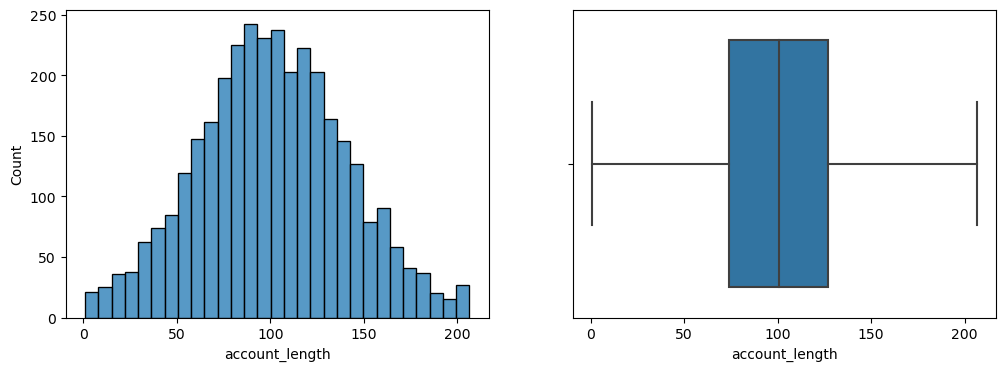

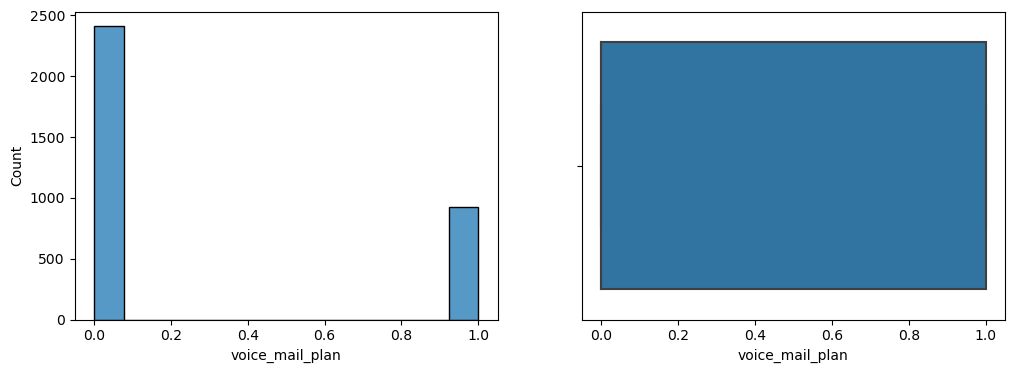

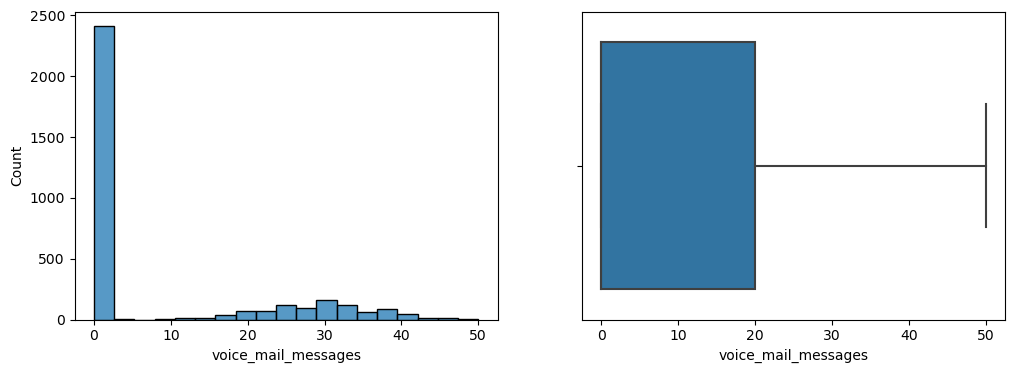

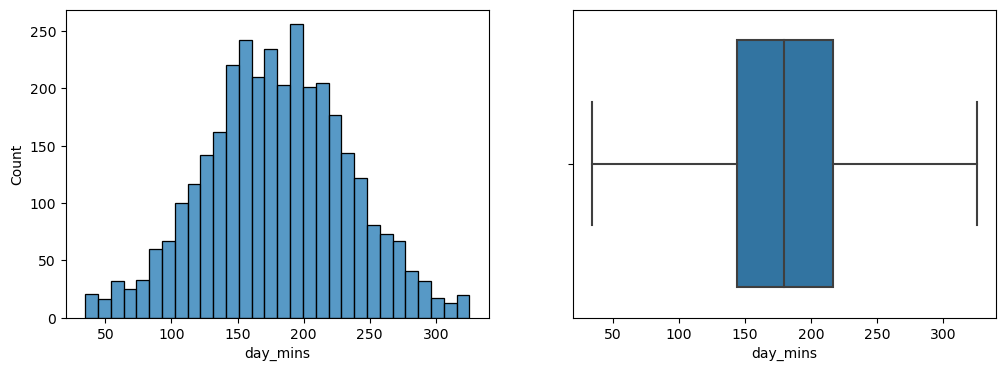

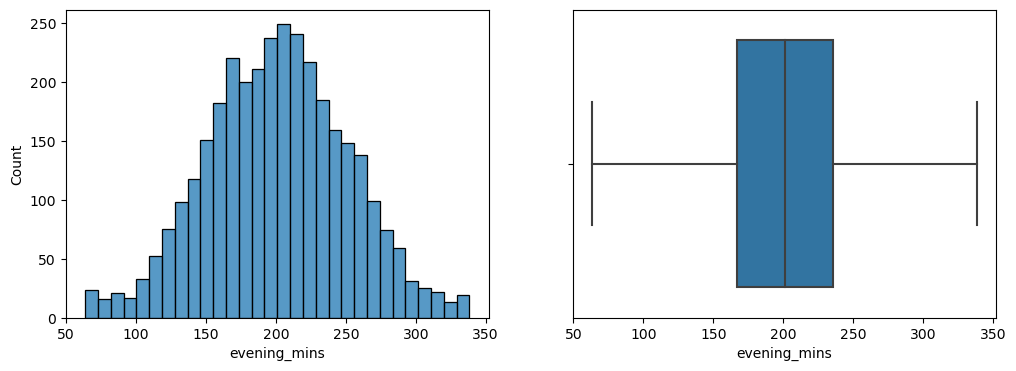

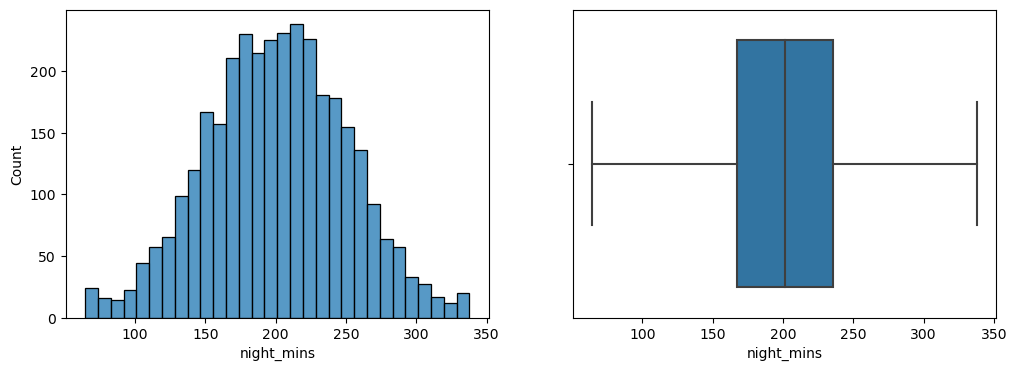

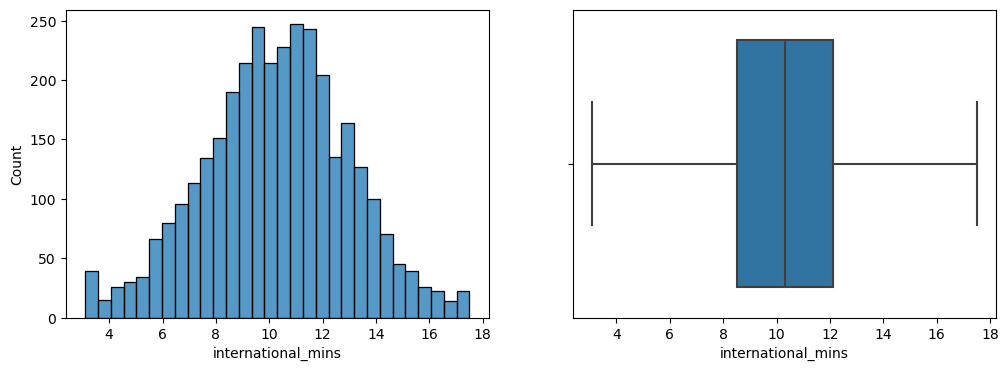

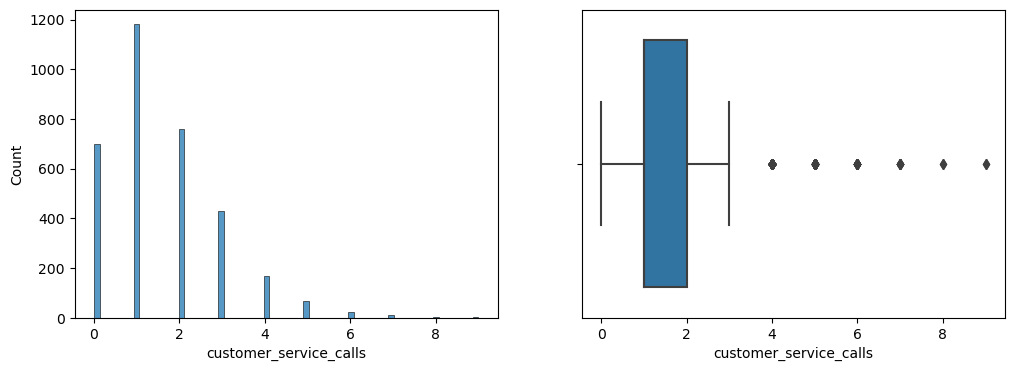

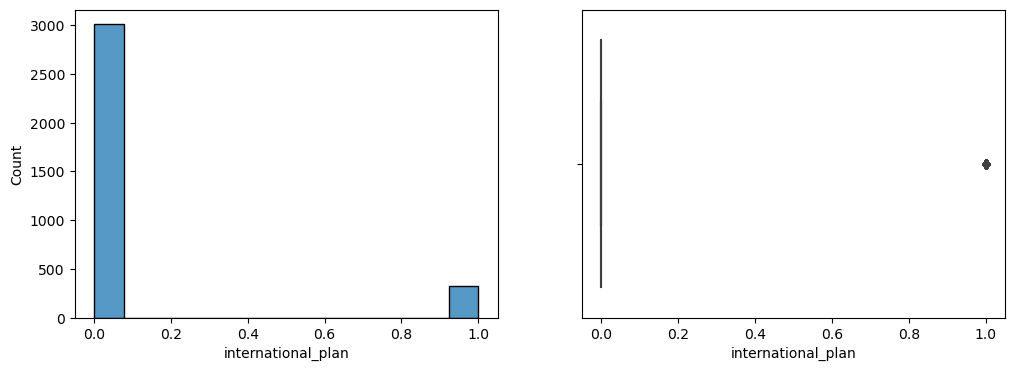

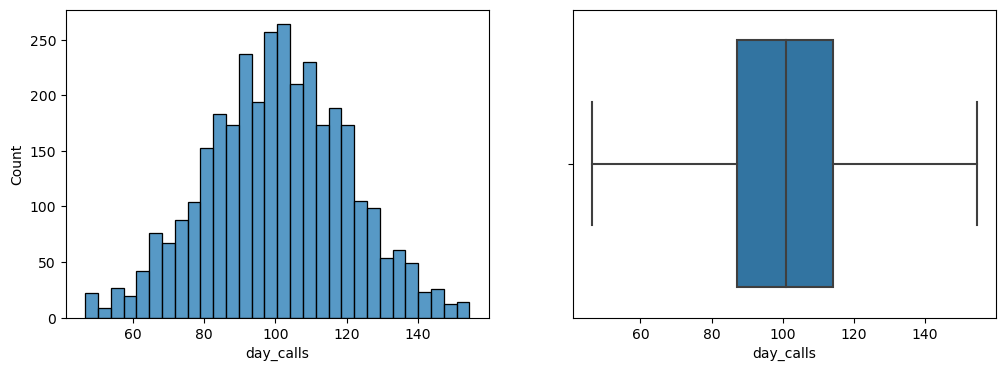

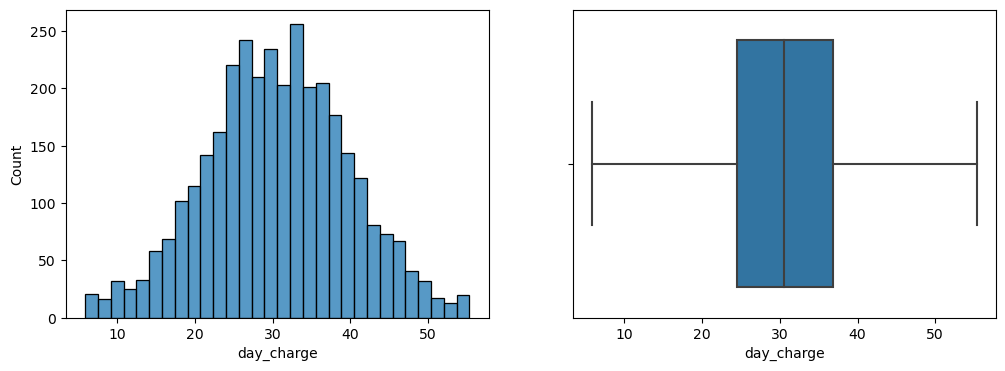

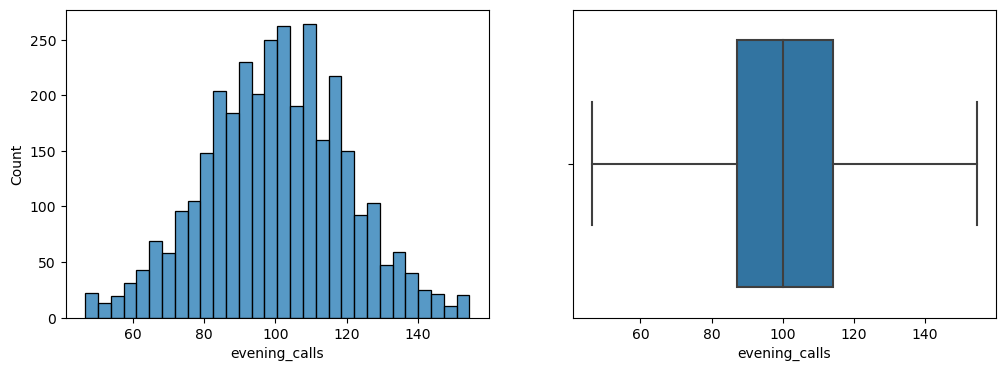

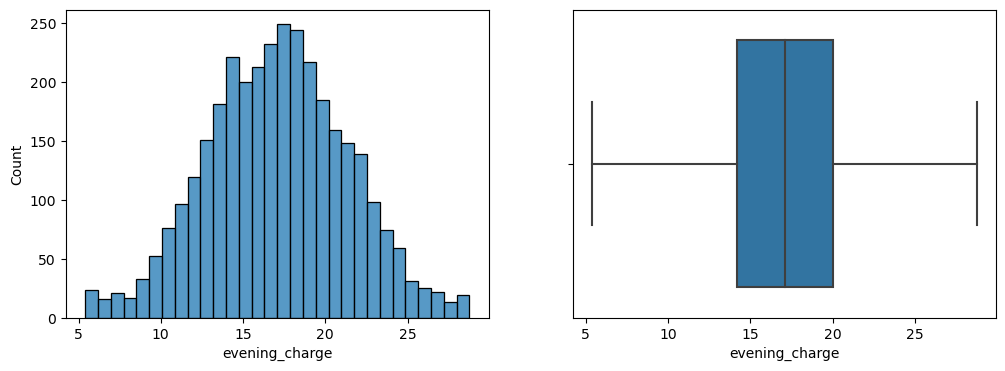

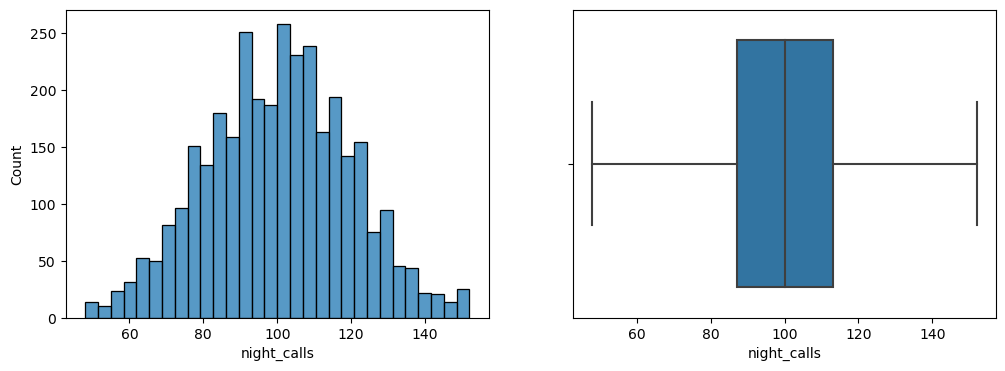

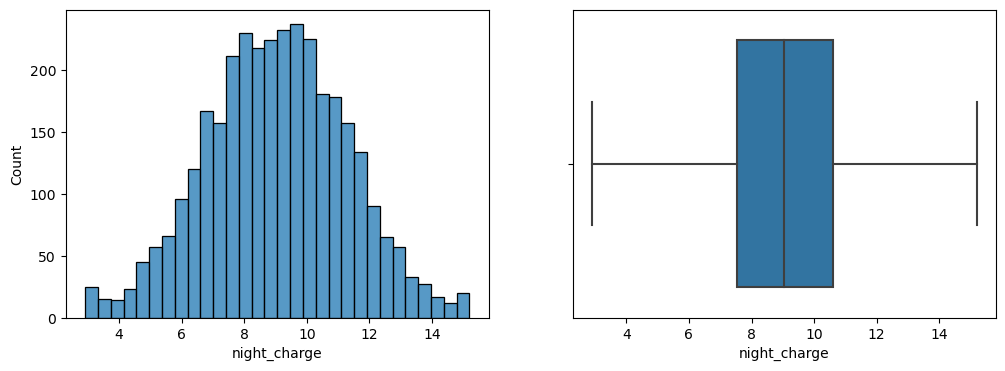

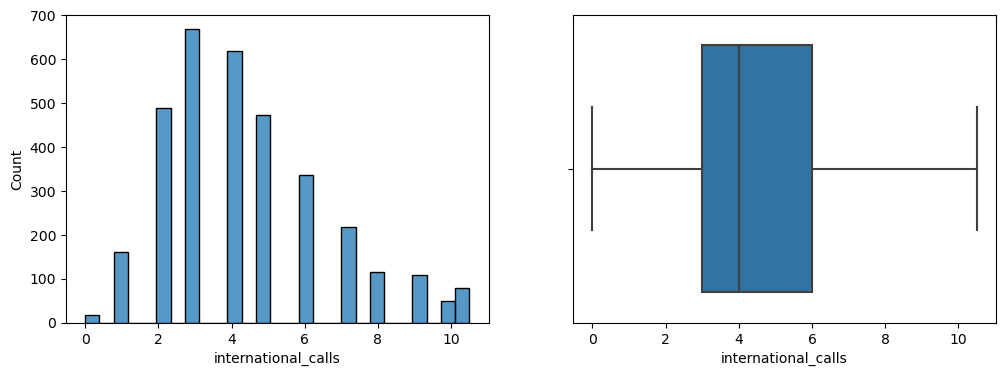

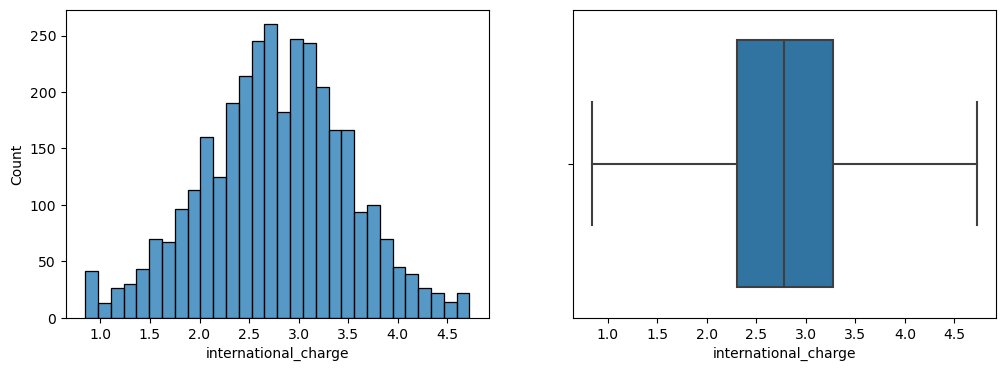

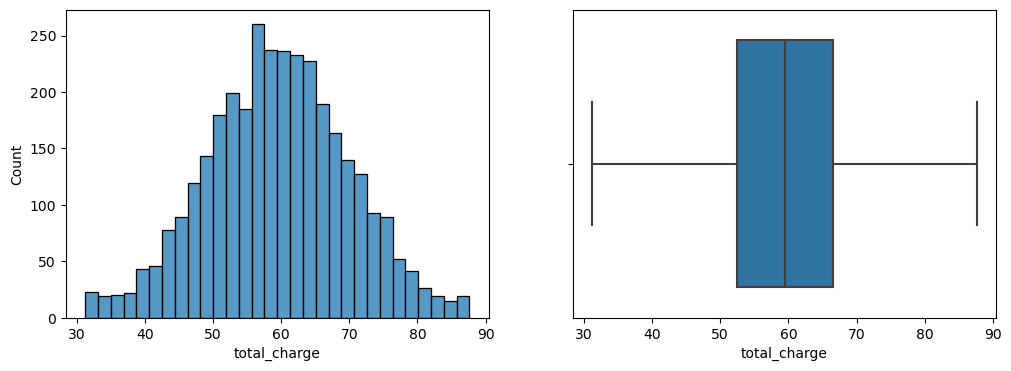

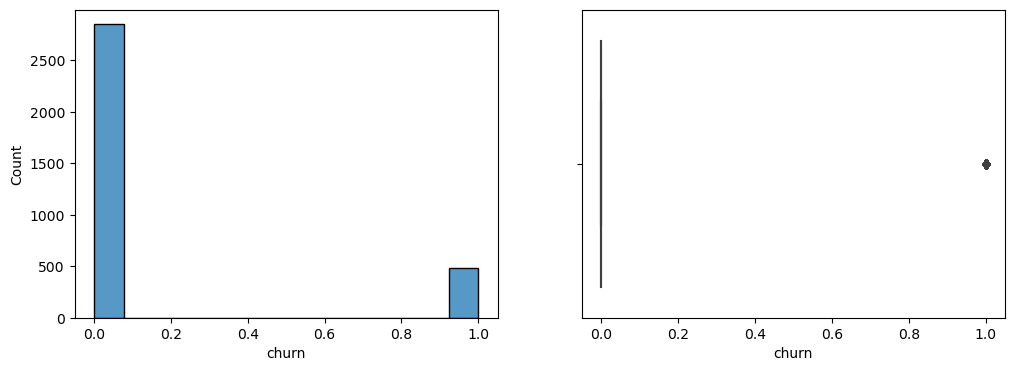

In [29]:
for i in df.columns:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4)) 
    sns.histplot(df[i], ax=ax[0])
    sns.boxplot(df[i], ax=ax[1])

In [30]:
# Divide the dataset into features and target variable
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [31]:
# Splitting the dataset training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2333, 18)
(1000, 18)
(2333,)
(1000,)


In [74]:
x_train

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
2016            80.0                0                  0.0    202.40   
1362            63.0                0                  0.0    132.90   
2670           116.0                1                 12.0    221.00   
2210            71.0                0                  0.0    278.90   
1846           120.0                1                 43.0    177.90   
...              ...              ...                  ...       ...   
1095           106.0                0                  0.0    274.40   
1130           122.0                0                  0.0     35.10   
1294            66.0                0                  0.0     87.60   
860            169.0                0                  0.0    179.20   
3174            36.0                1                 43.0     34.65   

      evening_mins  night_mins  international_mins  customer_service_calls  \
2016         260.2       177.4                 9.2                       3   
1362          67.0       160.4                 9.9                       3   
2670         151.0       179.0                 9.0                       2   
2210         190.2       255.2                11.7                       0   
1846         175.1       161.3                11.5                       1   
...            ...         ...                 ...                     ...   
1095         198.6       160.8                 6.0                       1   
1130         180.8       251.6                12.7                       1   
1294         262.0       184.6                 9.2                       1   
860          175.2       228.6                 9.9                       2   
3174         129.1       325.9                 8.6                       2   

      international_plan  day_calls  day_charge  evening_calls  \
2016                   0      118.0       34.41           67.0   
1362                   0      122.0       22.59           62.0   
2670                   0      108.0       37.57          118.0   
2210                   0      110.0       47.41           67.0   
1846                   0      117.0       30.24           70.0   
...                  ...        ...         ...            ...   
1095                   0      120.0       46.65           82.0   
1130                   0       62.0        5.97           89.0   
1294                   0       76.0       14.89          111.0   
860                    0      111.0       30.46          130.0   
3174                   0      123.0        5.89          117.0   

      evening_charge  night_calls  night_charge  international_calls  \
2016           22.12        112.0          7.98                  5.0   
1362            5.70        121.0          7.22                  2.0   
2670           12.84         80.0          8.06                  6.0   
2210           16.17         84.0         11.48                  7.0   
1846           14.88        117.0          7.26                  4.0   
...              ...          ...           ...                  ...   
1095           16.88         62.0          7.24                  3.0   
1130           15.37         58.0         11.32                  2.0   
1294           22.27        125.0          8.31                  5.0   
860            14.89         92.0         10.29                  6.0   
3174           10.97        105.0         14.67                  6.0   

      international_charge  total_charge  
2016                  2.48         66.99  
1362                  2.67         38.18  
2670                  2.43         60.90  
2210                  3.16         78.22  
1846                  3.11         55.49  
...                    ...           ...  
1095                  1.62         72.39  
1130                  3.43         36.09  
1294                  2.48         47.95  
860                   2.67         58.31  
3174                  2.32         33.04  

[2333 rows x 18 columns]

In [33]:
y_train.value_counts()

0    1993
1     340
Name: churn, dtype: int64

In [34]:
y_test.value_counts()

0    857
1    143
Name: churn, dtype: int64

In [35]:
# MinMax scaler to make the magnitude similar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
x_train_scale = scaler.fit_transform(x_train)
x_tests_scale = scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_scale, y_train)

LogisticRegression()

In [38]:
y_pred = model.predict(x_tests_scale)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
# We can see that it gives bad score for recall and f1_score
# Non linear data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       857
           1       0.53      0.18      0.27       143

    accuracy                           0.86      1000
   macro avg       0.70      0.58      0.60      1000
weighted avg       0.83      0.86      0.83      1000



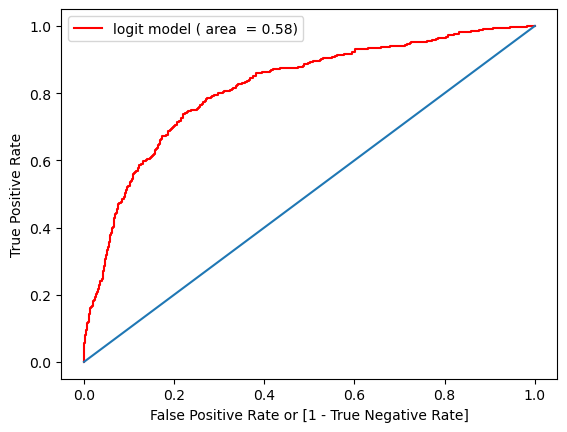

In [40]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(x_train_scale)[:,-1])
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()

In [41]:
# Decision Tree
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = [{'criterion':['gini', 'entropy'], 'max_depth' : [5,10,15,20], 'min_samples_split' : [5,10,15,20]}]
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
gsv = GridSearchCV(model_dt, param_grid, cv=10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 20],
                          'min_samples_split': [5, 10, 15, 20]}])

In [42]:
pd.DataFrame(gsv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.011131      0.002377         0.001330        0.000047   
1        0.011020      0.001134         0.001508        0.000221   
2        0.010692      0.000618         0.001464        0.000239   
3        0.010246      0.000148         0.001314        0.000033   
4        0.016130      0.000665         0.001390        0.000093   
5        0.016481      0.000789         0.001444        0.000214   
6        0.015832      0.000653         0.001191        0.000058   
7        0.015923      0.000566         0.001272        0.000049   
8        0.019138      0.000698         0.001260        0.000037   
9        0.019156      0.000683         0.001295        0.000065   
10       0.019115      0.000707         0.001299        0.000085   
11       0.019010      0.000696         0.001250        0.000022   
12       0.019866      0.000681         0.001292        0.000069   
13       0.019536      0.000810         0.001342        0.000174   
14       0.019611      0.000844         0.001349        0.000094   
15       0.020842      0.000950         0.001621        0.000257   
16       0.012905      0.000251         0.001651        0.000326   
17       0.013256      0.001551         0.001702        0.000439   
18       0.012493      0.000384         0.001407        0.000203   
19       0.011836      0.000123         0.001212        0.000050   
20       0.017983      0.000481         0.001312        0.000094   
21       0.018784      0.000758         0.001479        0.000131   
22       0.019097      0.000565         0.001636        0.000302   
23       0.018016      0.000443         0.001315        0.000069   
24       0.021035      0.001134         0.001284        0.000052   
25       0.021224      0.001135         0.001361        0.000100   
26       0.020914      0.001165         0.001293        0.000081   
27       0.020979      0.001078         0.001305        0.000063   
28       0.022091      0.001795         0.001278        0.000046   
29       0.022024      0.001783         0.001254        0.000035   
30       0.021934      0.001781         0.001265        0.000049   
31       0.021894      0.001881         0.001284        0.000058   

   param_criterion param_max_depth param_min_samples_split  \
0             gini               5                       5   
1             gini               5                      10   
2             gini               5                      15   
3             gini               5                      20   
4             gini              10                       5   
5             gini              10                      10   
6             gini              10                      15   
7             gini              10                      20   
8             gini              15                       5   
9             gini              15                      10   
10            gini              15                      15   
11            gini              15                      20   
12            gini              20                       5   
13            gini              20                      10   
14            gini              20                      15   
15            gini              20                      20   
16         entropy               5                       5   
17         entropy               5                      10   
18         entropy               5                      15   
19         entropy               5                      20   
20         entropy              10                       5   
21         entropy              10                      10   
22         entropy              10                      15   
23         entropy              10                      20   
24         entropy              15                       5   
25         entropy              15                      10   
26         entropy              15                      15   
27         entropy     

In [43]:
gsv.best_params_ , gsv.best_score_ 

({'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5},
 0.9742874436007483)

In [44]:
model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)

In [45]:
y_pred = model_dt.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       857
           1       0.98      0.88      0.93       143

    accuracy                           0.98      1000
   macro avg       0.98      0.94      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = [{'criterion':['gini', 'entropy']}]
gsv = GridSearchCV(model, param_grid, cv=10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy']}])

In [48]:
gsv.best_params_ , gsv.best_score_ 

({'criterion': 'entropy'}, 0.9738600931733978)

In [49]:
param_grid = [{'n_estimators' : [150,200,250,300],'max_features':[4,6,8,10]}]
gsv1 = GridSearchCV(model, param_grid, cv=10)
gsv1.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [4, 6, 8, 10],
                          'n_estimators': [150, 200, 250, 300]}])

In [50]:
gsv1.best_params_ , gsv1.best_score_ 

({'max_features': 6, 'n_estimators': 200}, 0.9755731631268112)

In [51]:
pd.DataFrame(gsv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.366066      0.004133         0.011640        0.000946   
1       0.412059      0.003717         0.011368        0.000450   

  param_criterion                    params  split0_test_score  \
0            gini     {'criterion': 'gini'}           0.974359   
1         entropy  {'criterion': 'entropy'}           0.978632   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.957265           0.978632           0.978541           0.991416   
1           0.957265           0.970085           0.982833           0.991416   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.969957           0.961373           0.974249           0.974249   
1           0.969957           0.961373           0.974249           0.978541   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.978541         0.973858        0.009066                2  
1           0.974249         0.973860        0.009458                1

In [52]:
pd.DataFrame(gsv1.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.603850      0.091836         0.016622        0.001719   
1        0.754429      0.031193         0.021681        0.002504   
2        0.917860      0.014303         0.025887        0.000436   
3        1.098095      0.009682         0.031452        0.002476   
4        0.720116      0.017276         0.016074        0.000446   
5        0.952598      0.015492         0.020812        0.000450   
6        1.270398      0.121891         0.031579        0.016827   
7        1.437584      0.020735         0.030266        0.000358   
8        0.913134      0.052647         0.017372        0.002573   
9        1.176985      0.019943         0.020543        0.000172   
10       1.460948      0.017058         0.025239        0.000232   
11       1.762553      0.027881         0.030396        0.000890   
12       1.045174      0.018268         0.016088        0.000812   
13       1.381157      0.012858         0.020503        0.000346   
14       1.730103      0.022568         0.025008        0.000136   
15       2.080025      0.023344         0.029690        0.000250   

   param_max_features param_n_estimators  \
0                   4                150   
1                   4                200   
2                   4                250   
3                   4                300   
4                   6                150   
5                   6                200   
6                   6                250   
7                   6                300   
8                   8                150   
9                   8                200   
10                  8                250   
11                  8                300   
12                 10                150   
13                 10                200   
14                 10                250   
15                 10                300   

                                       params  split0_test_score  \
0    {'max_features': 4, 'n_estimators': 150}           0.974359   
1    {'max_features': 4, 'n_estimators': 200}           0.974359   
2    {'max_features': 4, 'n_estimators': 250}           0.978632   
3    {'max_features': 4, 'n_estimators': 300}           0.974359   
4    {'max_features': 6, 'n_estimators': 150}           0.978632   
5    {'max_features': 6, 'n_estimators': 200}           0.974359   
6    {'max_features': 6, 'n_estimators': 250}           0.974359   
7    {'max_features': 6, 'n_estimators': 300}           0.974359   
8    {'max_features': 8, 'n_estimators': 150}           0.974359   
9    {'max_features': 8, 'n_estimators': 200}           0.974359   
10   {'max_features': 8, 'n_estimators': 250}           0.974359   
11   {'max_features': 8, 'n_estimators': 300}           0.978632   
12  {'max_features': 10, 'n_estimators': 150}           0.974359   
13  {'max_features': 10, 'n_estimators': 200}           0.974359   
14  {'max_features': 10, 'n_estimators': 250}           0.974359   
15  {'max_features': 10, 'n_estimators': 300}           0.974359   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.957265           0.982906           0.978541   
1            0.957265           0.978632           0.982833   
2            0.957265           0.978632           0.982833   
3            0.957265           0.982906           0.978541   
4            0.957265           0.982906           0.982833   
5            0.957265           0.982906           0.982833   
6            0.957265           0.982906           0.978541   
7            0.957265           0.982906           0.982833   
8            0.957265           0.982906           0.982833   
9            0.957265           0.982906           0.978541   
10           0.957265           0.982906           0.978541   
11           0.957265           0.982906           0.978541   
12           0.957265           0.982906           0.978541   
13           0.957265           0.982906           0.982833

In [53]:
# Final model
model = RandomForestClassifier(n_estimators=200,criterion='entropy',max_features=6)
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=6, n_estimators=200)

In [54]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       857
           1       1.00      0.87      0.93       143

    accuracy                           0.98      1000
   macro avg       0.99      0.94      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [56]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
param_grid = [{'n_estimators': [200,250,300], 'learning_rate':[0.001,0.01,0.1,0.25,0.6,0.9]}]
gsv = GridSearchCV(model, param_grid, cv = 10)
gsv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'learning_rate': [0.001, 0.01, 0.1, 0.25, 0.6, 0.9],
                          'n_estimators': [200, 250, 300]}])

In [57]:
pd.DataFrame(gsv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.687120      0.165572         0.033101        0.015318   
1        0.764247      0.004516         0.034072        0.000568   
2        0.928299      0.017647         0.041193        0.001446   
3        0.614990      0.009658         0.027413        0.000165   
4        0.768197      0.023495         0.034509        0.001754   
5        0.939161      0.072200         0.045486        0.015723   
6        0.698702      0.040378         0.030108        0.002110   
7        0.766785      0.003494         0.033801        0.000198   
8        0.924056      0.016356         0.040390        0.000881   
9        0.611940      0.003556         0.027544        0.000361   
10       0.770975      0.017680         0.034622        0.001183   
11       0.926059      0.024242         0.040830        0.001638   
12       0.617889      0.016902         0.027430        0.000531   
13       0.770063      0.012673         0.034738        0.001767   
14       0.944588      0.026741         0.041107        0.001101   
15       0.613810      0.004822         0.027389        0.000201   
16       0.772633      0.020044         0.034533        0.001095   
17       0.923169      0.011402         0.041227        0.002234   

   param_learning_rate param_n_estimators  \
0                0.001                200   
1                0.001                250   
2                0.001                300   
3                 0.01                200   
4                 0.01                250   
5                 0.01                300   
6                  0.1                200   
7                  0.1                250   
8                  0.1                300   
9                 0.25                200   
10                0.25                250   
11                0.25                300   
12                 0.6                200   
13                 0.6                250   
14                 0.6                300   
15                 0.9                200   
16                 0.9                250   
17                 0.9                300   

                                           params  split0_test_score  \
0   {'learning_rate': 0.001, 'n_estimators': 200}           0.893162   
1   {'learning_rate': 0.001, 'n_estimators': 250}           0.893162   
2   {'learning_rate': 0.001, 'n_estimators': 300}           0.893162   
3    {'learning_rate': 0.01, 'n_estimators': 200}           0.854701   
4    {'learning_rate': 0.01, 'n_estimators': 250}           0.854701   
5    {'learning_rate': 0.01, 'n_estimators': 300}           0.858974   
6     {'learning_rate': 0.1, 'n_estimators': 200}           0.905983   
7     {'learning_rate': 0.1, 'n_estimators': 250}           0.910256   
8     {'learning_rate': 0.1, 'n_estimators': 300}           0.905983   
9    {'learning_rate': 0.25, 'n_estimators': 200}           0.910256   
10   {'learning_rate': 0.25, 'n_estimators': 250}           0.914530   
11   {'learning_rate': 0.25, 'n_estimators': 300}           0.910256   
12    {'learning_rate': 0.6, 'n_estimators': 200}           0.910256   
13    {'learning_rate': 0.6, 'n_estimators': 250}           0.910256   
14    {'learning_rate': 0.6, 'n_estimators': 300}           0.905983   
15    {'learning_rate': 0.9, 'n_estimators': 200}           0.901709   
16    {'learning_rate': 0.9, 'n_estimators': 250}           0.901709   
17    {'learning_rate': 0.9, 'n_estimators': 300}           0.905983   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.905983           0.884615           0.901288   
1            0.905983           0.884615           0.901288   
2            0.905983           0.884615           0.901288   
3            0.884615           0.871795           0.858369   
4            0.884615           0.871795           0.866953   
5            0.884615           0.871795           0.866953   
6            0.923077           0.910256     

In [58]:
gsv.best_params_ , gsv.best_score_ 

({'learning_rate': 0.25, 'n_estimators': 250}, 0.9108378269322476)

In [59]:
model  = AdaBoostClassifier(n_estimators=250, learning_rate=0.25)
model.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.25, n_estimators=250)

In [60]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [61]:
# less accuracy compare to DT, RF
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       857
           1       0.77      0.55      0.64       143

    accuracy                           0.91      1000
   macro avg       0.85      0.76      0.79      1000
weighted avg       0.91      0.91      0.91      1000



In [62]:
# Xgboost 
import xgboost as xgb
#from xgboost.xgbclassifier import XGBClassifier
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [63]:
y_pred = model_xgb.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       857
           1       1.00      0.88      0.94       143

    accuracy                           0.98      1000
   macro avg       0.99      0.94      0.96      1000
weighted avg       0.98      0.98      0.98      1000



In [65]:
list1  = model_xgb.feature_importances_*100
cols = ['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge']
imp_feature = dict(zip(cols, list1)) 
imp_feature

{'account_length': 1.9472435,
 'voice_mail_plan': 30.473003,
 'voice_mail_messages': 2.061316,
 'day_mins': 1.6392837,
 'evening_mins': 2.2570817,
 'night_mins': 1.8067569,
 'international_mins': 6.1611114,
 'customer_service_calls': 11.359525,
 'international_plan': 10.068248,
 'day_calls': 2.2193813,
 'day_charge': 0.0,
 'evening_calls': 1.8353741,
 'evening_charge': 0.0,
 'night_calls': 1.9182265,
 'night_charge': 0.0,
 'international_calls': 9.630944,
 'international_charge': 0.0,
 'total_charge': 16.622505}

In [66]:
import pickle

In [67]:
# # Save the trained model
filename = "trained_model.sav"
pickle.dump(model_xgb, open(filename,'wb'))

In [68]:
# Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [69]:
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

C:\Users\user\Churn_predictiom.py

In [70]:
import pickle

In [71]:
# # Save the trained model
filename='trained_model.pkl'
pickle.dump(model_xgb,open(filename,'wb'))

In [72]:
# Loading the saved model
loaded_model=pickle.load(open('trained_model.pkl','rb'))

In [73]:
loaded_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [75]:
# # Save the trained model
filename='model.pkl'
pickle.dump(model_dt,open(filename,'wb'))

In [76]:
# Loading the saved model
loaded_model=pickle.load(open('model.pkl','rb'))

In [77]:
loaded_model

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=5)